<a href="https://colab.research.google.com/github/EAName/yelp-reviews/blob/main/YelpBusiness_St_Louis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  # Remove the CWD from sys.path while we load stuff.


# Ingest Business Clean 6

In [3]:
FILE = '/content/gdrive/MyDrive/yelp_dataset/yelp_business_clean_version6.csv'

In [4]:
df = pd.read_csv( FILE )
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,market,RestaurantsTakeOut,HasTV,BusinessAcceptsCreditCards,BusinessParking,RestaurantsPriceRange2,RestaurantsReservations,AgesAllowed_21plus,AgesAllowed_allages,Alcohol_None,Alcohol_beer_and_wine,Alcohol_full_bar,BYOBCorkage_no,BYOBCorkage_yes_corkage,BYOBCorkage_yes_free,NoiseLevel_average,NoiseLevel_loud,NoiseLevel_quiet,NoiseLevel_very_loud,RestaurantsAttire_casual,RestaurantsAttire_dressy,RestaurantsAttire_formal,Smoking_no,Smoking_outdoor,Smoking_yes,WiFi_free,WiFi_no,WiFi_paid,garage,street,validated,lot,valet,Nightlife,Bars,American (Traditional),Pizza,American (New),Sandwiches,Italian,Breakfast & Brunch,Mexican,Seafood,ChineseTotal,Burgers,Salad,Chicken Wings,Sports Bars,JapaneseTotal,HasTV_NA,RestaurantsPriceRange2_NA,RestaurantsReservations_NA,garage_NA,validated_NA,lot_NA,valet_NA
0,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123.0,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': ""u'full_bar'"", 'RestaurantsAttire': ""u'casual'"", 'RestaurantsDelivery': 'False', 'RestaurantsTakeOut': 'True', 'HasTV': 'True', 'NoiseLevel': ""u'average'"", 'BusinessAcceptsCreditCards': 'True', 'OutdoorSeating': 'True', 'BusinessParking': ""{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}"", 'Ambience': ""{'romantic': False, 'intimate': False, 'touristy': False, 'hipster': False, 'divey': False, 'classy': False, 'trendy': False, 'upscale': False, 'casual': False}"", 'RestaurantsPriceRange2': '1', 'GoodForKids': 'True', 'WiFi': ""u'free'"", 'RestaurantsReservations': 'False', 'RestaurantsGoodForGroups': 'True'}","Pubs, Restaurants, Italian, Bars, American (Traditional), Nightlife, Greek",St. Louis,1.0,1.0,1.0,"{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}",1.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0.0,0.0,0.0,1.0,0.0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,il_Ro8jwPlHresjw9EGmBg,Denny's,8901 US 31 S,Indianapolis,IN,46227.0,39.637133,-86.127217,2.5,28,1,"{'RestaurantsReservations': 'False', 'RestaurantsTakeOut': 'True', 'RestaurantsAttire': ""'casual'"", 'GoodForKids': 'True', 'BikeParking': 'False', 'RestaurantsPriceRange2': '1', 'BusinessAcceptsCreditCards': 'True', 'GoodForMeal': ""{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'brunch': False, 'breakfast': False}"", 'RestaurantsGoodForGroups': 'True', 'OutdoorSeating': 'False', 'WiFi': ""u'no'"", 'Alcohol': ""'none'"", 'RestaurantsDelivery': 'True', 'BusinessParking': ""{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}"", 'HasTV': 'True', 'Ambience': ""{'touristy': None, 'hipster': None, 'romantic': False, 'divey': None, 'intimate': None, 'trendy': None, 'upscale': None, 'classy': None, 'casual': True}""}","American (Traditional), Restaurants, Diners, Breakfast & Brunch",Indianapolis,1.0,1.0,1.0,"{'garage': None, 'street': False, 'validated': None, 'lot': True, 'valet': False}",1.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106.0,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'RestaurantsGoodForGroups': 'True', 'RestaurantsAttire': ""'casual'"", 'BusinessAcceptsCreditCards': 'True', 'WiFi': ""'free'"", 'HasTV': 'False', 'RestaurantsTakeOut': 'True', 'Ambience': ""{'touristy': False, 'hipster': False, 'romantic': False, 'divey': False, 'intimate': False, 'trendy': False, 'upscale': False, 'classy': True, 'casual': False}"", 'GoodForKids': 'False', 'GoodForMeal': ""{'dessert': True, 'latenight': None, 'lunch': None, 'dinner': True, 'brunch': None, 'breakfast': None}"", 'NoiseLevel': ""u'average'"", 'RestaurantsPriceRange2': '2', 'Alcohol': ""'full_bar'"", 'DogsAllowed': 'False', 'HappyHour': 'True', 'Resta

In [5]:
df.shape

(30930, 69)

In [6]:
# check # of rows for St. Louis


len(df[df['market'] == "St. Louis"])

3181

St.Louis has 3,181 restaurants in Business Clean 6

# Create New DF with St. Louis only

In [48]:
df_stlouis = df.copy(deep = True)

In [49]:
df_stlouis = df_stlouis[df_stlouis['market'] == 'St. Louis']

In [50]:
df_stlouis.shape

(3181, 69)

In [ ]:
df_stlouis.head()

In [51]:
#export St Louis business
#download to csv

df_stlouis.to_csv('df_stlouis.csv', index = False)
files.download('df_stlouis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Linear Regression St Louis

In [52]:
df_stlouis.drop(["business_id","name","address","city","state","postal_code","latitude",
              "longitude","attributes","categories","BusinessParking","market",'Alcohol_None', 
              'BYOBCorkage_yes_free', 'NoiseLevel_average', 'NoiseLevel_quiet',
              'Smoking_yes', 'WiFi_no', 'Nightlife', 'Bars', 'Sandwiches'], axis =1, inplace = True)

In [53]:
df_stlouis.shape

(3181, 48)

In [58]:
#Check Multicollinearity with VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [59]:
X = add_constant(Xstl)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                         75.546259
review_count                  1.381024 
is_open                       1.291742 
RestaurantsTakeOut            1.144091 
HasTV                         1.554717 
BusinessAcceptsCreditCards    1.082678 
RestaurantsPriceRange2        2.454034 
RestaurantsReservations       1.452302 
AgesAllowed_21plus            1.032067 
AgesAllowed_allages           1.022791 
Alcohol_beer_and_wine         1.313436 
Alcohol_full_bar              2.288149 
BYOBCorkage_no                1.024107 
BYOBCorkage_yes_corkage       1.040764 
NoiseLevel_loud               1.111345 
NoiseLevel_very_loud          1.044428 
RestaurantsAttire_casual      2.148039 
RestaurantsAttire_dressy      1.651225 
RestaurantsAttire_formal      1.028157 
Smoking_no                    1.110403 
Smoking_outdoor               1.153039 
WiFi_free                     1.321709 
WiFi_paid                     1.022447 
garage                        1.184987 
street                        1.478430 


highest VIF = garage_na, validated_NA, valet_NA
VIF ~ 4.0 still below 5

In [54]:
#split df into test and train

Xstl = df_stlouis.drop(columns = ['stars'])
ystl = df_stlouis['stars']

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xstl,ystl, test_size = 0.2, random_state = 10)

In [56]:
X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print_model = model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [57]:
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     17.81
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          6.61e-123
Time:                        21:23:09   Log-Likelihood:                -2393.2
No. Observations:                2544   AIC:                             4882.
Df Residuals:                    2496   BIC:                             5163.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Drop based on p value >0.05: RestaurantReservations, AgesAllowed21plus, Agesallowed_allages, Alcohol_full_bar, BYOB_yes_corkage, BYOB_corkage_no,
Restaurant attire dressy and formal, Smoking_no, validated, lot, valet,
American (new), Italian, Mexican, Seafood, Burgers, Salad, JapaneseTotal, RestaurantPriceRangeNA, validated_NA, lot_NA, valet_NA

# Linear Regression St. Louis 2

In [62]:
df_stlouis.drop(["RestaurantsTakeOut","RestaurantsReservations", "AgesAllowed_21plus", "AgesAllowed_allages", "Alcohol_full_bar", "BYOBCorkage_yes_corkage", "BYOBCorkage_no",
                 "RestaurantsAttire_dressy", "RestaurantsAttire_formal", "Smoking_no", "validated", "lot", "valet",
                 "American (New)", "Italian", "Mexican", "Seafood", "Burgers", "Salad", "JapaneseTotal", "RestaurantsPriceRange2_NA", 
                 "validated_NA", "lot_NA", "valet_NA" ], axis =1, inplace = True)

In [63]:
df_stlouis.shape

(3181, 24)

In [65]:
#split df into test and train

Xstl = df_stlouis.drop(columns = ['stars'])
ystl = df_stlouis['stars']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(Xstl,ystl, test_size = 0.2, random_state = 305)

In [67]:
#Linear St. Louis2

X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     33.87
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          3.49e-129
Time:                        21:41:10   Log-Likelihood:                -2400.5
No. Observations:                2544   AIC:                             4849.
Df Residuals:                    2520   BIC:                             4989.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Drop WiFi_paid based on p value >0.05

# Linear Regression St. Louis 3

In [68]:
df_stlouis.drop(["WiFi_paid"],axis =1, inplace = True)

In [69]:
df_stlouis.shape

(3181, 23)

In [70]:
#split df into test and train

Xstl = df_stlouis.drop(columns = ['stars'])
ystl = df_stlouis['stars']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(Xstl,ystl, test_size = 0.2, random_state = 407)

In [72]:
X_Train = X_train
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     33.54
Date:                Wed, 02 Nov 2022   Prob (F-statistic):          3.16e-123
Time:                        21:47:24   Log-Likelihood:                -2429.9
No. Observations:                2544   AIC:                             4906.
Df Residuals:                    2521   BIC:                             5040.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


# Linear Regression St. Louis 3 TEST

In [73]:
#RUN LINEAR ON TEST

X_test = X_test
X_test = sm.add_constant(X_test)

predictions = model.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [74]:
# Performance metrics: RMSE, MAE, r-squared, adjusted r-squared
from statsmodels.tools.eval_measures import rmse, meanabs

RMSE_linear = rmse(y_test, predictions)
MAE_linear = meanabs(y_test, predictions)
print("Linear Regression RMSE", RMSE_linear, "MAE_linear", MAE_linear)

Linear Regression RMSE 0.6247032974405923 MAE_linear 0.4880787014664905


ST Louis Linear Regression performance results on test

R-squared: 0.257

Adj. R-squared: 0.230

RMSE: 0.6247

MAE: 0.4881

In [75]:
# r-SQUARED AND ADJUSTED R-SQUARED ON TEST


X_test = X_test
X_test = sm.add_constant(X_test)

model = sm.OLS(y_test, X_test).fit()
#predictions = model.predict(X_train) 

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                     9.632
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           9.85e-28
Time:                        21:52:49   Log-Likelihood:                -585.07
No. Observations:                 637   AIC:                             1216.
Df Residuals:                     614   BIC:                             1319.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

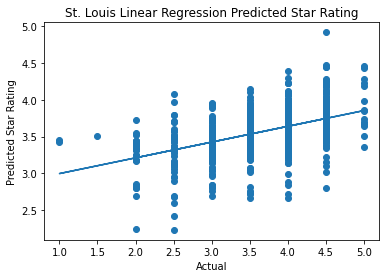

In [76]:
#Actual vs Fitted
x = y_test
y = predictions


plt.scatter(x, y)
#plt.plot(range(5), range(5))

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.xlabel("Actual")
plt.ylabel("Predicted Star Rating")
plt.title("St. Louis Linear Regression Predicted Star Rating")

plt.show()

# Logistic Regression St Louis

### Multinomial Logistic Regression still breaks with statsmodels due to floats

In [30]:
#delete unnecessary columns

df_stlouis.drop(["business_id","name","address","city","state","postal_code","latitude",
              "longitude","attributes","categories","BusinessParking","market",'Alcohol_None', 
              'BYOBCorkage_yes_free', 'NoiseLevel_average', 'NoiseLevel_quiet',
              'Smoking_yes', 'WiFi_no', 'Nightlife', 'Bars', 'Sandwiches'], axis =1, inplace = True)

In [31]:
df_stlouis.shape

(3181, 48)

In [39]:
#split df into test and train

Xstl = df_stlouis.drop(columns = ['stars'])
ystl = str(df_stlouis['stars'])

In [40]:
#convert stl data to numpy
Xstl_np = Xstl.to_numpy()

#ystl_np = ystl.to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xstl_np,ystl, test_size = 0.2, random_state = 10)

ValueError: ignored

In [35]:
X_train.shape

(2544, 47)

In [36]:
X_train = sm.add_constant(X_train)

model = sm.MNLogit(y_train, X_train, check_rank=True)

result=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:4195: SpecificationWarning: endog contains values are that not int-like. Uses string representation of value. Use integer-valued endog to suppress this warning.
  warnings.warn(msg, SpecificationWarning)


Optimization terminated successfully.
         Current function value: nan
         Iterations 14


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2290: RuntimeWarning: overflow encountered in exp
  eXB = np.column_stack((np.ones(len(X)), np.exp(X)))
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:2291: RuntimeWarning: invalid value encountered in true_divide
  return eXB/eXB.sum(1)[:,None]


In [37]:
stats1=result.summary()

In [ ]:
print(stats1)